##### Metrics for Classification Sticth Fabric Detection
- Accuracy (Most Important)
- F1 Score 
- Precision
- Recall
- Time Complexity (Important)
- ROC AUC (Optional)
- Kappa (Optional)
- MCC (Optional)

### Calculation Metrics

- **Confusion Matrix**: Defined as TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)

- **Accuracy**: `(TP + TN) / (TP + TN + FN + FP)`

- **Error Rate**: `(FP + FN) / (TP + TN + FN + FP)`

- **Sensitivity (Recall)**: `TP / (TP + FN)`

- **Specificity**: `TN / (TN + FP)`

- **Balanced Accuracy**: `(Sensitivity + Specificity) / 2`

- **Precision**: `TP / (TP + FP)`

- **F1-Score**: `2 * (Precision * Recall) / (Precision + Recall)`

- **Macro**: A type of averaging method for multiclass classification

- **Weighted**: A type of averaging method that takes class imbalance into account

- **ROC AUC**: Area Under the Receiver Operating Characteristic Curve

- **PR AUC**: Area Under the Precision-Recall Curve

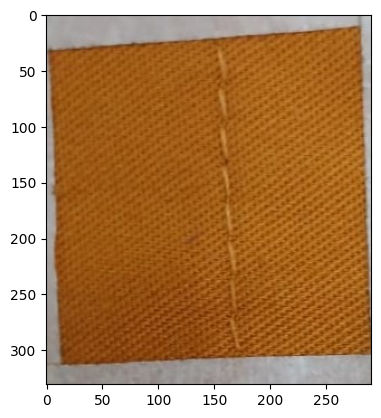

In [1492]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('File Coba ESP32/22.jpg')

# Convert the image to RGB (OpenCV uses BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

The resolution of the image is 291x331 pixels.


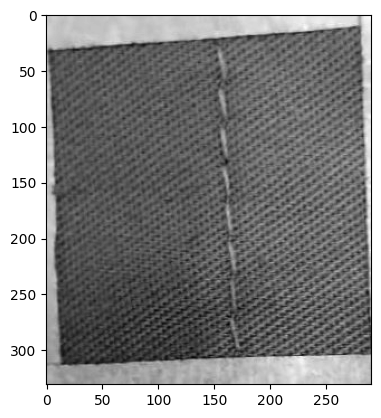

In [1493]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('File Coba ESP32/22.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Failed to load image")
else:
    height, width = image.shape[:2]
    print(f'The resolution of the image is {width}x{height} pixels.')
    plt.imshow(image, cmap='gray')

In [1494]:
# np.set_printoptions(threshold=np.inf)

# print(image.shape) 
# print(image)

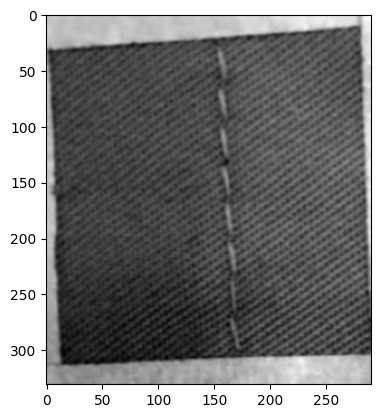

In [1495]:
# Apply Gaussian blur to the image
image = cv2.GaussianBlur(image, (5, 5), 0)

plt.imshow(image, cmap='gray')

In [1496]:
# image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,13,5)

# plt.imshow(image, cmap='gray')

In [1497]:
# # Draw Lines
# lines = cv2.HoughLines(image, 10, np.pi/180, 20)

# if lines is not None:
# 	for rho, theta in lines[:, 0]:
# 		a = np.cos(theta)
# 		b = np.sin(theta)
# 		x0 = a * rho
# 		y0 = b * rho
# 		x1 = int(x0 + 1000 * (-b))
# 		y1 = int(y0 + 1000 * (a))
# 		x2 = int(x0 - 1000 * (-b))
# 		y2 = int(y0 - 1000 * (a))
# 		cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# plt.imshow(image, cmap='gray')

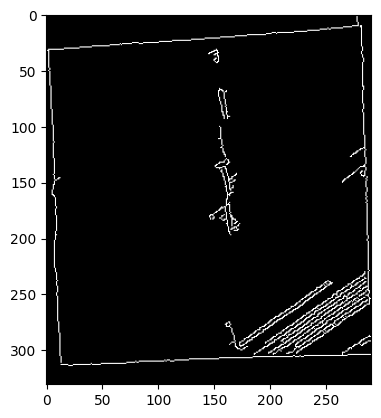

In [1498]:
# Edge detection
image = cv2.Canny(image, 50, 150)

plt.imshow(image, cmap='gray')

In [1499]:
# # Reverse the color of the image
# image = cv2.bitwise_not(image)

# plt.imshow(image, cmap='gray')

In [1500]:
# # Finding all the lines in an image based on given parameters
# contours, hierarchy = cv2.findContours(image, 
#     cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# # #Reverting the original image back to BGR so we can draw in colors
# # image = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)

# #parameter -1 specifies that we want to draw all the contours
# cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
# plt.imshow(image)

In [1501]:
# hist,bin_edges = np.histogram(image,bins=256,range=(0,256))
# plt.plot(hist)
# plt.show()

In [1502]:
# image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,13,5)
# plt.imshow(image, cmap='gray')

In [1503]:
# if the gap between the lines is bigger then the rest choose it as a line
# if the gap between the lines is smaller then make it white


In [1504]:
# # Edge detection
# image = cv2.Canny(image, 50, 150)

# plt.imshow(image)

In [1505]:
# # Find contours
# contours, _ = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [1506]:
# print(f'Found {len(contours)} contours in the image.')

# # Draw the contours on the original image
# image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
# cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# plt.imshow(image)

In [1507]:
# # Perform edge detection
# image = cv2.Canny(image, 50, 150)

# plt.imshow(image)

In [1508]:
# # Get the image dimensions
# height, width = image.shape[:2]

# # The start point is the top-left corner of the image
# start_point = (0, 0)

# # The end point is the bottom-right corner of the image
# end_point = (width - 1, height - 1)

# print(f'The start point is {start_point} and the end point is {end_point}.')

In [1509]:
# # The arguments are: image, start_point, end_point, color(BGR), thickness
# image = cv2.line(image, (0, 240), (10, 200), (0, 255, 0), 5)

# plt.imshow(image)

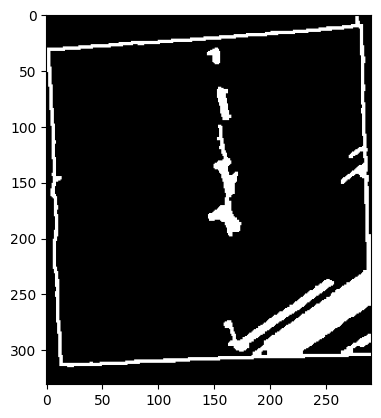

In [1510]:
image = cv2.dilate(image, None, iterations=2)
image = cv2.erode(image, None, iterations=1)

plt.imshow(image, cmap='gray')

Number of lines: 5


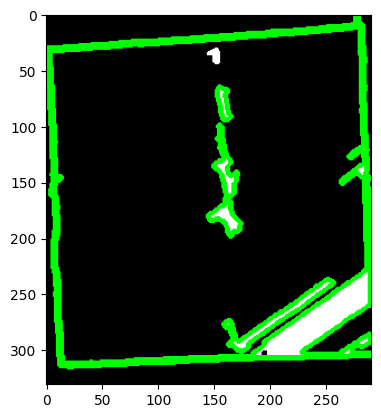

In [1511]:
_, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

# Count White Lines Of The Images
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours and count the remaining ones
lines = [c for c in contours if cv2.contourArea(c) > 100]
number_of_lines = len(lines)

# Draw the contours on the original image
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

cv2.drawContours(image, lines, -1, (0, 255, 0), 3)

plt.imshow(image)
print(f'Number of lines: {number_of_lines}')

In [1512]:
# # Apply thresholding to segment out the dots
# _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# # Find contours in the thresholded image
# contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # Iterate through the contours and remove small dots
# for contour in contours:
#     area = cv2.contourArea(contour)
#     if area < 10:  # adjust this value to set the minimum dot size
#         cv2.drawContours(image, [contour], -1, (0, 0, 0), -1)

# # Save the output image
# cv2.imwrite('image_without_small_dots.jpg', image)

# # Display the image
# img = plt.imread('image_without_small_dots.jpg')
# plt.imshow(img)

In [1513]:
# image = cv2.Canny(image,250,200)
# plt.imshow(image, cmap='gray')

In [1514]:
# lines = cv2.HoughLinesP(image, 1, np.pi/180, 60, minLineLength=10, maxLineGap=250)
# for i in range(2):
#   print(lines[i])

In [1515]:
# # Draw the lines
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# # Display the image with lines
# plt.imshow(image, cmap='gray')

In [1516]:
# # Perform edge detection
# image = cv2.Canny(image, 50, 150)

# plt.imshow(image, cmap='gray')

In [1517]:
# # Perform a dilation and erosion to close gaps in between object edges
# image = cv2.dilate(image, None, iterations=2)
# image = cv2.erode(image, None, iterations=1)

# plt.imshow(image, cmap='gray')

In [1518]:
# # Make The Same Thing But With Image In Folder dataset
# from imutils import paths
# import imutils, os, cv2, pickle
# from transformers import AutoImageProcessor, RegNetForImageClassification
# imagePaths = list(paths.list_images("dataset"))

# # Initialize the total number of faces processed
# total = 0

# # Loop over the image paths
# for (i, imagePath) in enumerate(imagePaths):
#     print("[INFO] processing image {} / {}".format(i + 1, len(imagePaths)))
#     # Extract the Image Inside The Folder
#     name = imagePath.split(os.path.sep)[-2]
#     image_name = imagePath.split(os.path.sep)[-1]

#     # Load The Image
#     image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    
#     # Augment With Canny
#     image = cv2.Canny(image, 50, 150)

#     # Perform a dilation and erosion to close gaps in between object edges
#     image = cv2.dilate(image, None, iterations=2)
#     image = cv2.erode(image, None, iterations=1)

#     # Create directory if it doesn't exist
#     os.makedirs(f"dataset\\{name}", exist_ok=True)

#     # Save The Image
#     cv2.imwrite(f"dataset\\{name}\\{image_name}", image)

#     # print the label of the image that get from directory with matplotlib
#     plt.title(name)
#     # Show the image result
#     plt.imshow(image)

#     # Update The Total Number Of Faces Processed
#     total += 1

In [1519]:
# # Find contours in the eroded image
# contours, hierarchy = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Filter contours based on the area. This value might need to be adjusted.
# filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# # Draw the contours on the original image
# image = cv2.drawContours(image, filtered_contours, -1, (0, 255, 0), 3)

# plt.imshow(image)

In [1520]:
# # Create a hough line transform object
# lines = cv2.HoughLines(image, 1, np.pi/180, 100)
# print(f'Number of lines detected: {len(lines)}')
# lines = lines.tolist()
# lines = lines[0]

In [1521]:
# print(lines)

In [1522]:
# for rho,theta in lines:
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))

#     cv2.line(image,(x1,y1),(x2,y2),(255,0,0),2)

# cv2.imshow('Hough Line Transform', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [1523]:
# from imutils import paths
# import imutils, os, cv2, pickle
# import numpy as np

# imagePaths = list(paths.list_images("dataset"))

# # Initialize the list of extracted face embeddings and
# # corresponding names
# knownEmbeddings = []
# knownNames = []

# # Initialize the total number of faces processed
# total = 0

# # Loop over the image paths
# for (i, imagePath) in enumerate(imagePaths):
#     print("[INFO] processing image {} / {}".format(i + 1, len(imagePaths)))
#     name = imagePath.split(os.path.sep)[-2]

#     # Load The Image And Automatilcally Resize To 600:600
#     image = cv2.imread(imagePath)
#     image = imutils.resize(image, width=600)
#     (h, w) = image.shape[:2]

#     # Implement Detector To Automatically Crop Image To The Pattern We Want

#     # Apply Embedding Model To Convert Image To 1D Vector ()

#     total += 1

# # Dump the face embeddings + names to disk
# data = {"embeddings": knownEmbeddings, "names": knownNames}
# f = open("output/embeddings.pickle", "wb")
# f.write(pickle.dumps(data))
# f.close()